In [13]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
train_data = pd.read_csv(r"C:\Users\qqqq\Desktop\train (1).csv")
test_data = pd.read_csv(r"C:\Users\qqqq\Desktop\test.csv")
train_data.head()

id  age           job   marital            education  default housing loan  \
0   1   51        admin.  divorced  professional.course       no     yes  yes   
1   2   50      services   married          high.school  unknown     yes   no   
2   3   48   blue-collar  divorced             basic.9y       no      no   no   
3   4   26  entrepreneur    single          high.school      yes     yes  yes   
4   5   45        admin.    single    university.degree       no      no   no   

    contact month  ... campaign  pdays  previous     poutcome  emp_var_rate  \
0  cellular   aug  ...        1    112         2      failure           1.4   
1  cellular   may  ...        1    412         2  nonexistent          -1.8   
2  cellular   apr  ...        0   1027         1      failure          -1.8   
3  cellular   aug  ...       26    998         0  nonexistent           1.4   
4  cellular   nov  ...        1    240         4      success          -3.4   

  cons_price_index  cons_conf_index  lending_rate3m  nr_employed  subscribe  
0            90.81           -35.53            0.69      5219.74         no  
1            96.33           -40.58            4.05      4974.79        yes  
2            96.33           -44.74            1.50      5022.61         no  
3            97.08           -35.55            5.11      5222.87        yes  
4            89.82           -33.83            1.17      4884.70         no  

[5 rows x 22 columns]

In [14]:
subscribe_counts = train_data['subscribe'].value_counts()
print(subscribe_counts)
print('no ：', round(train_data['subscribe'].value_counts()['no']/len(train_data) * 100,2), '%')
print('yes：', round(train_data['subscribe'].value_counts()['yes']/len(train_data) * 100,2), '%')

subscribe
no     19548
yes     2952
Name: count, dtype: int64
no ： 86.88 %
yes： 13.12 %


In [15]:
missing_values = train_data.isnull().sum()
print(missing_values)

id                  0
age                 0
job                 0
marital             0
education           0
default             0
housing             0
loan                0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp_var_rate        0
cons_price_index    0
cons_conf_index     0
lending_rate3m      0
nr_employed         0
subscribe           0
dtype: int64


In [16]:
data_types = train_data.dtypes
print(data_types)

id                    int64
age                   int64
job                  object
marital              object
education            object
default              object
housing              object
loan                 object
contact              object
month                object
day_of_week          object
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome             object
emp_var_rate        float64
cons_price_index    float64
cons_conf_index     float64
lending_rate3m      float64
nr_employed         float64
subscribe            object
dtype: object


In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
features_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'subscribe']
features_to_encode2 = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for feature in features_to_encode:
    train_data[feature] = label_encoder.fit_transform(train_data[feature])
for feature in features_to_encode2:
    test_data[feature] = label_encoder.fit_transform(test_data[feature])
print(train_data.head())
data_types = train_data.dtypes
print(data_types)

   id  age  job  marital  education  default  housing  loan  contact  month  \
0   1   51    0        0          5        0        2     2        0      1   
1   2   50    7        1          3        1        2     0        0      6   
2   3   48    1        0          2        0        0     0        0      0   
3   4   26    2        2          3        2        2     2        0      1   
4   5   45    0        2          6        0        0     0        0      7   

   ...  campaign  pdays  previous  poutcome  emp_var_rate  cons_price_index  \
0  ...         1    112         2         0           1.4             90.81   
1  ...         1    412         2         1          -1.8             96.33   
2  ...         0   1027         1         0          -1.8             96.33   
3  ...        26    998         0         1           1.4             97.08   
4  ...         1    240         4         2          -3.4             89.82   

   cons_conf_index  lending_rate3m  nr_employed  s

In [18]:
# 对定量数据进行 min-max标准化
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['age','duration','campaign','pdays','previous','emp_var_rate','cons_price_index','cons_conf_index','lending_rate3m','nr_employed']
# 创建MinMaxScaler对象
scaler = MinMaxScaler()

# 使用fit_transform进行标准化
train_data[columns_to_normalize] = scaler.fit_transform(train_data[columns_to_normalize])
test_data[columns_to_normalize] = scaler.fit_transform(test_data[columns_to_normalize])

train_data.head()

id       age  job  marital  education  default  housing  loan  contact  \
0   1  0.411765    0        0          5        0        2     2        0   
1   2  0.400000    7        1          3        1        2     0        0   
2   3  0.376471    1        0          2        0        0     0        0   
3   4  0.117647    2        2          3        2        2     2        0   
4   5  0.341176    0        2          6        0        0     0        0   

   month  ...  campaign     pdays  previous  poutcome  emp_var_rate  \
0      1  ...  0.017544  0.106870  0.333333         0      1.000000   
1      6  ...  0.017544  0.393130  0.333333         1      0.333333   
2      0  ...  0.000000  0.979962  0.166667         0      0.333333   
3      1  ...  0.456140  0.952290  0.000000         1      1.000000   
4      7  ...  0.017544  0.229008  0.666667         2      0.000000   

   cons_price_index  cons_conf_index  lending_rate3m  nr_employed  subscribe  
0          0.268190         0.640101        0.019272     0.651509          0  
1          0.735195         0.457988        0.738758     0.335069          1  
2          0.735195         0.307970        0.192719     0.396845          0  
3          0.798646         0.639380        0.965739     0.655552          1  
4          0.184433         0.701406        0.122056     0.218685          0  

[5 rows x 22 columns]

In [19]:
# 需要进行分箱的数值型特征列表
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_index', 'cons_conf_index', 'lending_rate3m', 'nr_employed']

# 定义分箱的数量
num_bins = 5

# 对每个数值型特征进行等宽分箱
for feature in numeric_features:
    train_data[feature + '_bin'] = pd.cut(train_data[feature], bins=num_bins, labels=False)
    test_data[feature + '_bin'] = pd.cut(test_data[feature], bins=num_bins, labels=False)

# 查看分箱后的数据
train_data.head()

id       age  job  marital  education  default  housing  loan  contact  \
0   1  0.411765    0        0          5        0        2     2        0   
1   2  0.400000    7        1          3        1        2     0        0   
2   3  0.376471    1        0          2        0        0     0        0   
3   4  0.117647    2        2          3        2        2     2        0   
4   5  0.341176    0        2          6        0        0     0        0   

   month  ...  age_bin  duration_bin  campaign_bin  pdays_bin  previous_bin  \
0      1  ...        2             4             0          0             1   
1      6  ...        1             4             0          1             1   
2      0  ...        1             0             0          4             0   
3      1  ...        0             0             2          4             0   
4      7  ...        1             3             0          1             3   

   emp_var_rate_bin  cons_price_index_bin  cons_conf_index_bin  \
0                 4                     1                    3   
1                 1                     3                    2   
2                 1                     3                    1   
3                 4                     3                    3   
4                 0                     0                    3   

   lending_rate3m_bin  nr_employed_bin  
0                   0                3  
1                   3                1  
2                   0                1  
3                   4                3  
4                   0                1  

[5 rows x 32 columns]

<Axes: >

Error in callback <function _draw_all_if_interactive at 0x00000224FA29D8A0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

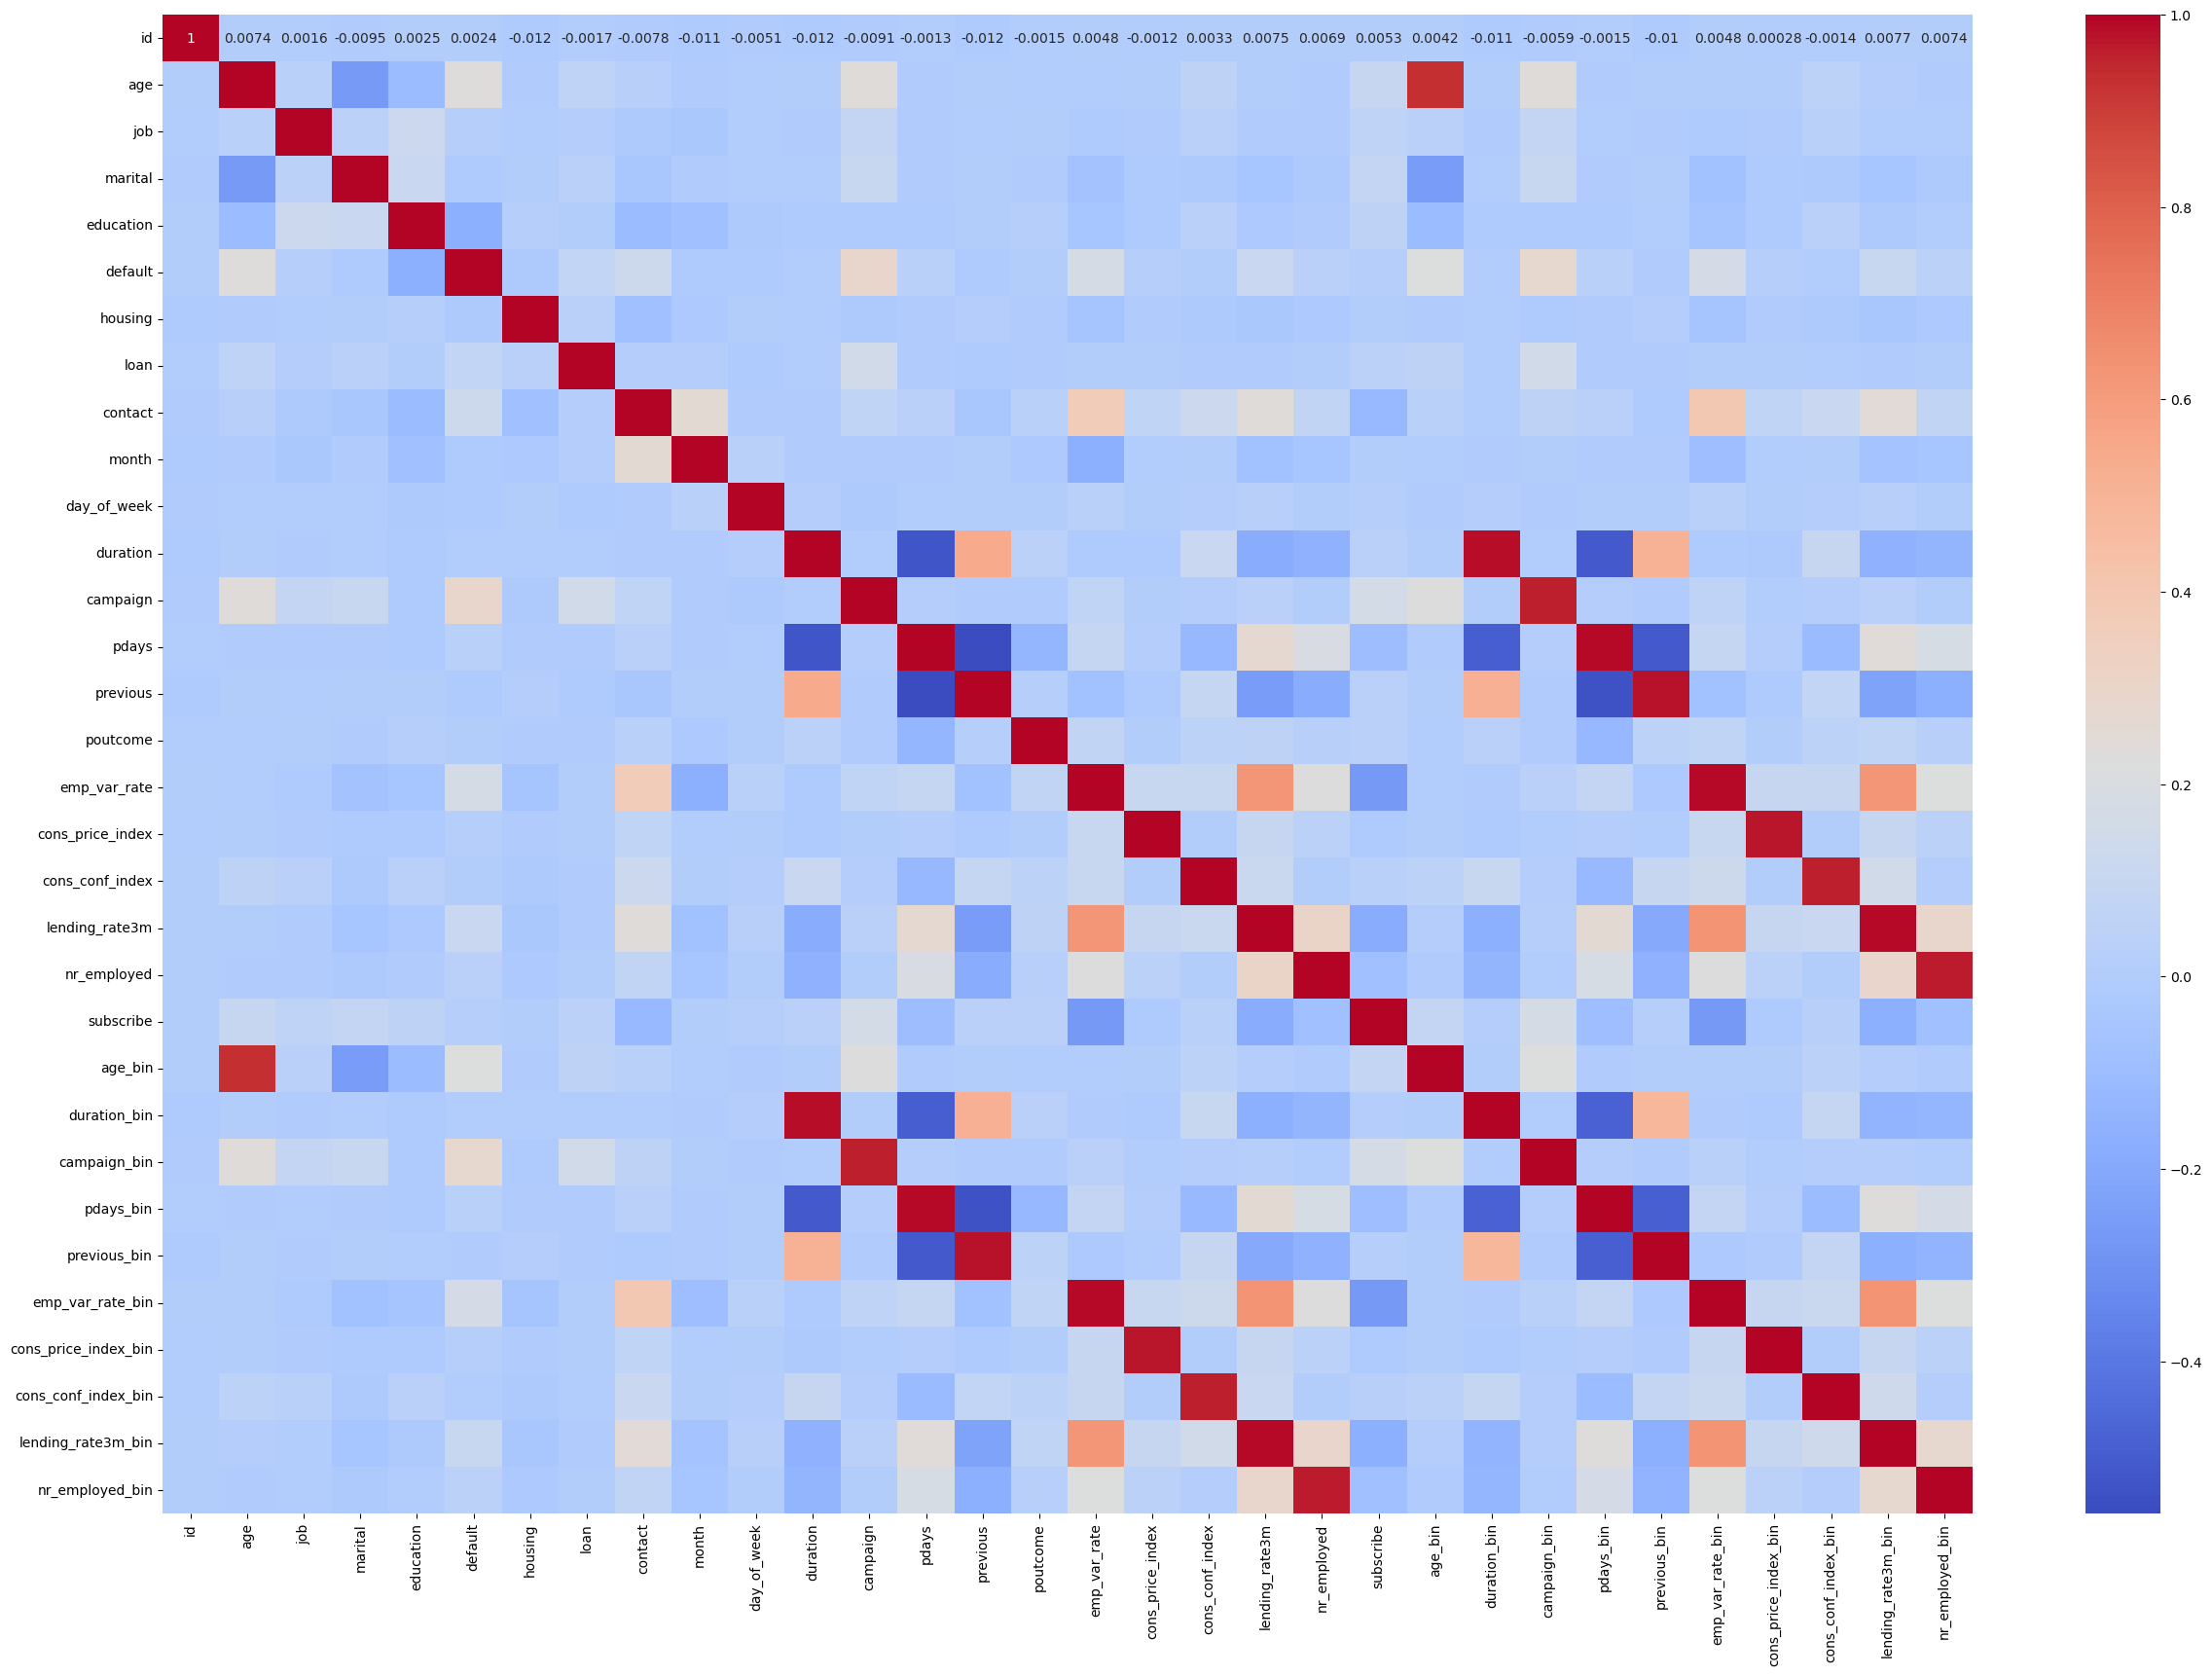

In [20]:

import seaborn as sns
import matplotlib.pyplot as plt
# 计算特征之间的相关性矩阵
corr_matrix = train_data.corr()

plt.figure(figsize=(30, 20))

# 计算特征之间的相关性矩阵
corr_matrix = train_data.corr()

# 使用热力图可视化相关性矩阵
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [ ]:
# 设置相关性阈值
correlation_threshold = 0.01

# 根据相关性阈值筛选特征
selected_features = []
for feature in corr_matrix:
    if abs(corr_matrix[feature]['subscribe']) >= correlation_threshold:
        selected_features.append(feature)

# 剔除相关性较低的特征
train_data_filtered = train_data[selected_features]
selected_features = [feature for feature in selected_features if feature != 'subscribe']
test_data_filtered = test_data[selected_features]

# 查看筛选后的数据
print(selected_features)
print(train_data_filtered.head())

['age', 'job', 'marital', 'education', 'default', 'loan', 'contact', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_index', 'cons_conf_index', 'lending_rate3m', 'nr_employed', 'age_bin', 'duration_bin', 'campaign_bin', 'pdays_bin', 'previous_bin', 'emp_var_rate_bin', 'cons_price_index_bin', 'cons_conf_index_bin', 'lending_rate3m_bin', 'nr_employed_bin']
        age  job  marital  education  default  loan  contact  day_of_week  \
0  0.411765    0        0          5        0     2        0            1   
1  0.400000    7        1          3        1     0        0            1   
2  0.376471    1        0          2        0     0        0            4   
3  0.117647    2        2          3        2     2        0            0   
4  0.341176    0        2          6        0     0        0            3   

   duration  campaign  ...  age_bin  duration_bin  campaign_bin  pdays_bin  \
0  0.897456  0.017544  ...        2             4 

In [ ]:
from sklearn.model_selection import train_test_split

# 划分特征和目标变量
X = train_data_filtered.drop('subscribe', axis=1).values
y = train_data_filtered['subscribe'].values
test = test_data_filtered.values

# 划分训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 将训练集和测试集转换为 DataFrame
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
test = pd.DataFrame(test)

# 查看训练集和验证集的大小
print("训练集:", X_train.shape)
print(y_train.value_counts())
print("验证集:", X_test.shape)
print(y_test.value_counts())

训练集: (18000, 28)
0    15644
1     2356
Name: count, dtype: int64
验证集: (4500, 28)
0    3904
1     596
Name: count, dtype: int64


In [ ]:
#模型的初步选择与评估
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
classifiers = {
    'LogisticRegression':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'LGBM':LGBMClassifier(),
    'XGB':XGBClassifier(),
    'GradientBoosting':GradientBoostingClassifier(),
}

#交叉验证
def accuracy_score(X_train, y_train):
    for key, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        training_score = cross_val_score(classifier, X_train, y_train, cv=5) # 5折交叉验证
        print("Classifier Name : ", classifier.__class__.__name__)
        print("Training Score ：", round(training_score.mean(), 2))
        
#调用函数，进行模型的初步选择与评估
accuracy_score(X_train, y_train)

Classifier Name :  LogisticRegression
Training Score ： 0.87
Classifier Name :  DecisionTreeClassifier
Training Score ： 0.84
[LightGBM] [Info] Number of positive: 2356, number of negative: 15644
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1771
[LightGBM] [Info] Number of data points in the train set: 18000, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130889 -> initscore=-1.893122
[LightGBM] [Info] Start training from score -1.893122
[LightGBM] [Info] Number of positive: 1885, number of negative: 12515
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total

In [ ]:
#网格搜索，获取最优超参数，对模型进行优化
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# 定义模型列表和参数网格
models = [

    {
        'model': LGBMClassifier(),
        'param_grid': {
         'n_estimators':[300],

         'learning_rate':[0.2, 0.02],

         'subsample':[0.6],

         'colsample_bytree':[0.6],

         'max_depth':[9, 11, 13],

         'is_unbalance':[False],

         'num_boost_round':[5000],

         'metric':['binary_logloss'],

         'feature_fraction':[0.6, 0.75, 0.9],

         'bagging_fraction':[0.6, 0.75, 0.9],

         'lambda_l1':[0, 0.1, 0.4, 0.5],

         'lambda_l2':[0, 10, 15, 35],

         'cat_smooth':[1, 10, 15, 20]

        }
    },
    {
        'model': XGBClassifier(),
        'param_grid': {
            'n_estimators':[50, 100, 150, 200],
            'max_depth':[5, 6, 7, 8, 9, 10],
            'learning_rate':[0.05, 0.1, 0.15, 0.2],
            'subsample': [0.6, 0.7, 0.8, 0.9, 1],
            'colsample_bytree':[0.6, 0.7, 0.8, 0.9, 1]
        }
    },
    {
        'model': GradientBoostingClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.05,0.1,],
            'max_depth': [6,8,10],
            'min_samples_split':[2,3,4,5],
            'min_samples_leaf':[1,2]
        }

    }
]

# 对每个模型进行参数调整和性能评估
for model_info in models:
    model = model_info['model']
    param_grid = model_info['param_grid']

    grid_search = GridSearchCV(model, param_grid, cv=5, error_score='raise')
    grid_search.fit(X_train, y_train)

    print("模型:", model.__class__.__name__)
    print("最佳参数:", grid_search.best_params_)
    print("最佳得分:", grid_search.best_score_)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.6 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] num_iterations is set=5000, num_boost_round=5000 will be ignored. Current value: num_iterations=5000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current valu

KeyboardInterrupt: 

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support
#model = RandomForestClassifier()
#model = LGBMClassifier(learning_rate=0.02, max_depth=9, n_estimators=300, subsample=0.6, colsample_bytree=0.6,boost_round = 1000,  is_unbalance = False, metrics = 'binary_logloss')
model = XGBClassifier(learning_rate=0.05, max_depth=10, n_estimators=110, subsample=0.9, colsample_bytree=0.9)
#model = XGBClassifier()
#model = GradientBoostingClassifier(learning_rate = 0.1,max_depth = 10, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)

# 训练模型
model.fit(X_train, y_train)

# 预测验证集
y_pred = model.predict(X_test)

# 计算准确率和F1分数
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
micro_f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("Micro-F1:", micro_f1)
print("accuracy:", accuracy)
print("f1_score:", f1)

# 输出分类报告
class_report = classification_report(y_test, y_pred)
print("classification_report:")
print(class_report)

Precision: 0.6144578313253012
Recall: 0.3422818791946309
Micro-F1: 0.8844444444444445
accuracy: 0.8844444444444445
f1_score: 0.8698973225643537
classification_report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3904
           1       0.61      0.34      0.44       596

    accuracy                           0.88      4500
   macro avg       0.76      0.65      0.69      4500
weighted avg       0.87      0.88      0.87      4500



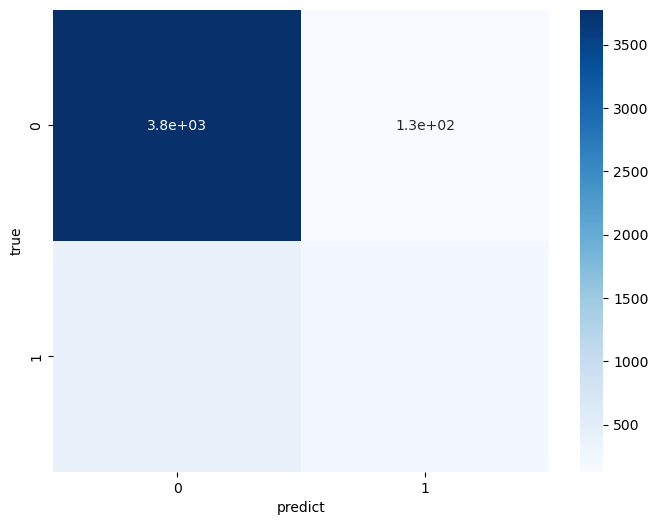

In [22]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix_result = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('predict')
plt.ylabel('true')
plt.show()

In [23]:
test_pred = model.predict(test)
print("预测结果:", test_pred)

预测结果: [0 0 0 ... 0 0 0]


In [24]:
result = pd.read_csv(r"C:\Users\qqqq\Desktop\数据\after_submission.csv")
subscribe_map ={1: 'yes', 0: 'no'}
result['subscribe'] = [subscribe_map[x] for x in test_pred]
result.to_csv(r"C:\Users\qqqq\Desktop\数据\after_submission.csv", index=False)
result['subscribe'].value_counts()

subscribe
no     6982
yes     518
Name: count, dtype: int64